In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fmi = pd.read_csv("./datasets/fmi_kumpula_20230515-20240514.csv", sep=",", na_values="-")
fmi

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [UTC],Lämpötilan keskiarvo [°C],Suhteellisen kosteuden keskiarvo [%],Keskituulen nopeus [m/s],Tunnin sademäärä [mm],Ilmanpaineen keskiarvo [hPa],Ylin lämpötila [°C],Alin lämpötila [°C],Kovin keskituulen nopeus [m/s],Tuulen suunnan keskiarvo [°],Kovin puuska [m/s]
0,Helsinki Kumpula,2023,5,15,00:00,9.2,79,1.5,0.0,1022.3,9.9,8.9,2.0,213.0,2.7
1,Helsinki Kumpula,2023,5,15,01:00,8.8,80,1.4,0.0,1022.0,9.1,8.5,2.2,242.0,3.0
2,Helsinki Kumpula,2023,5,15,02:00,8.2,85,0.8,0.0,1021.8,8.5,8.0,1.6,285.0,1.7
3,Helsinki Kumpula,2023,5,15,03:00,8.4,87,1.6,0.0,1021.7,9.3,7.8,2.4,86.0,2.9
4,Helsinki Kumpula,2023,5,15,04:00,10.2,77,1.4,0.0,1021.5,11.5,9.3,2.0,90.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8765,Helsinki Kumpula,2024,5,14,19:00,10.7,81,2.9,0.0,1021.4,11.4,10.3,4.0,155.0,5.7
8766,Helsinki Kumpula,2024,5,14,20:00,10.2,80,2.2,0.0,1021.7,10.4,10.0,3.2,140.0,4.1
8767,Helsinki Kumpula,2024,5,14,21:00,9.8,78,1.6,0.0,1021.8,10.3,9.2,2.1,146.0,2.6
8768,Helsinki Kumpula,2024,5,14,22:00,9.1,83,1.2,0.0,1021.9,9.3,8.7,1.6,175.0,2.0


In [3]:
fmi.dtypes

Havaintoasema                            object
Vuosi                                     int64
Kuukausi                                  int64
Päivä                                     int64
Aika [UTC]                               object
Lämpötilan keskiarvo [°C]               float64
Suhteellisen kosteuden keskiarvo [%]      int64
Keskituulen nopeus [m/s]                float64
Tunnin sademäärä [mm]                   float64
Ilmanpaineen keskiarvo [hPa]            float64
Ylin lämpötila [°C]                     float64
Alin lämpötila [°C]                     float64
Kovin keskituulen nopeus [m/s]          float64
Tuulen suunnan keskiarvo [°]            float64
Kovin puuska [m/s]                      float64
dtype: object

In [4]:
fmi2 = fmi.copy()

fmi2["Päivämäärä"] = pd.to_datetime(fmi2["Vuosi"].astype(str) + "-" +
                                    fmi2["Kuukausi"].astype(str) + "-" +
                                    fmi2["Päivä"].astype(str) + " " +
                                    fmi2["Aika [UTC]"].astype(str))

fmi2 = fmi2.set_index("Päivämäärä")

fmi2 = fmi2.drop(columns=["Havaintoasema","Vuosi","Kuukausi","Päivä","Aika [UTC]"])

fmi2 = fmi2.dropna(axis=0)
print("NA dropped:", len(fmi)-len(fmi2))

NA dropped: 6


In [5]:
cols = ['Lämpötilan keskiarvo [°C]', 'Alin lämpötila [°C]', 'Ylin lämpötila [°C]',
        'Tunnin sademäärä [mm]', 'Suhteellisen kosteuden keskiarvo [%]',
        'Ilmanpaineen keskiarvo [hPa]',
        'Keskituulen nopeus [m/s]', 'Kovin keskituulen nopeus [m/s]', 'Kovin puuska [m/s]',
        'Tuulen suunnan keskiarvo [°]']
fmi2 = fmi2[cols]

array([<AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>,
       <AxesSubplot:xlabel='Päivämäärä'>], dtype=object)

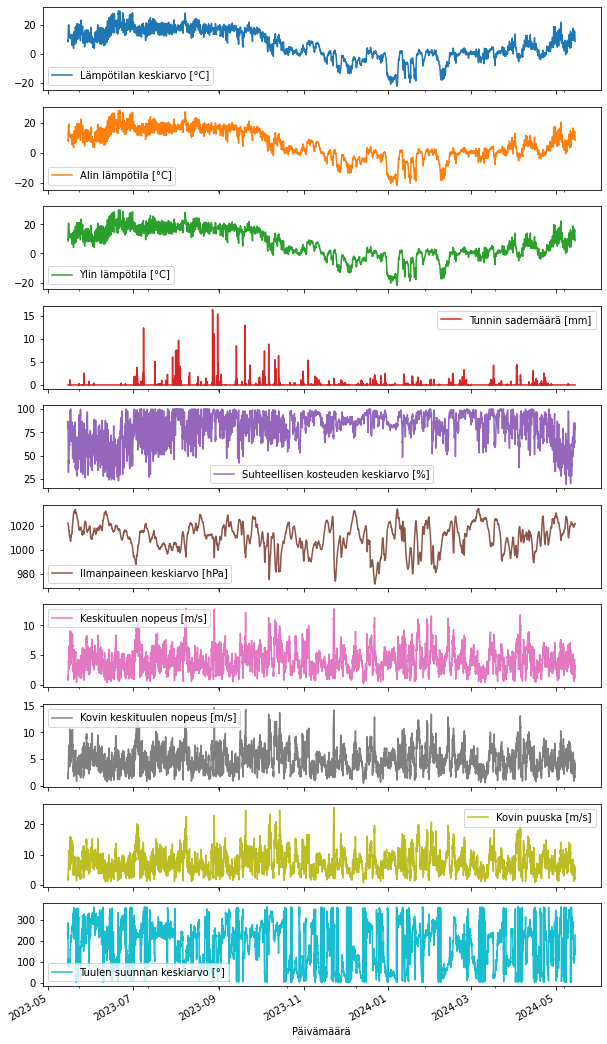

In [6]:
fmi2.plot(subplots=True, figsize=(10,20))

In [7]:
fmi2.to_csv("./datasets/preprocessed/fmi_20230515_20240514_1h.csv", index=False)

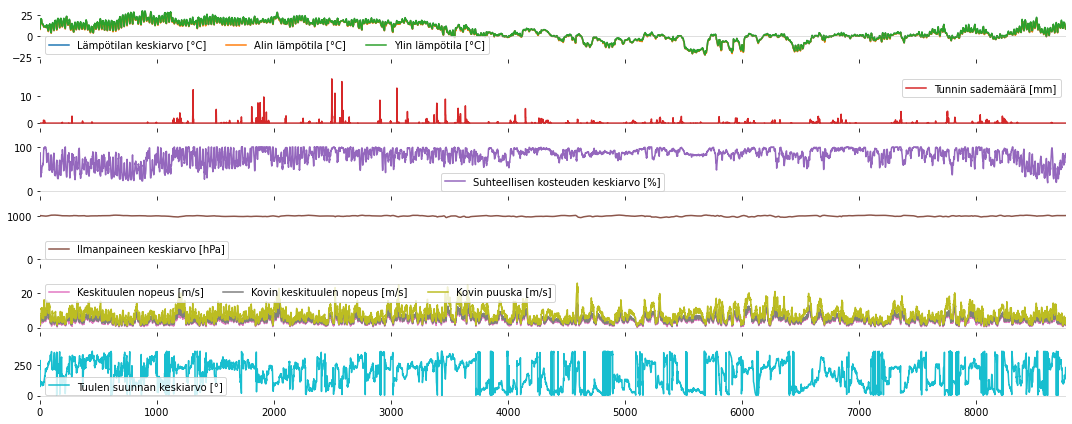

In [11]:
from datasets.plots import plot_datasets2
plot_datasets2(fmi2, [(range(3)), (3,), (4,), (5,), (range(6,9)), (9,)])
plt.savefig(f"datasets/plots/fmi.png", dpi=300)